In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import os
import math
import shutil
import matplotlib.pyplot as plt
import glob

In [4]:
ROOT_DIR="BrainTumorData/Brain Tumor Data Set"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [5]:
number_of_images.items()

dict_items([('Brain Tumor', 81), ('Healthey', 81)])

In [6]:
len(os.listdir("BrainTumorData/Brain Tumor Data Set"))

2

In [7]:
def dataFolder(p,split):
    
    
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)
        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)
            for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                             size=(math.floor(split*number_of_images[dir])-2),replace=False):
                O=os.path.join(ROOT_DIR,dir,img)
                D=os.path.join("./"+p,dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print("Folder Exist")

In [8]:
dataFolder("train",0.7)

Folder Exist


In [9]:
dataFolder("val",0.15)

Folder Exist


In [10]:
dataFolder("test",0.10)

Folder Exist


In [11]:
number_of_images={}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
    

number_of_images.items()

dict_items([('Brain Tumor', 81), ('Healthey', 81)])

In [12]:
from keras.layers import Conv2D,MaxPool2D,Dropout,GlobalAveragePooling2D,Flatten,Dense,BatchNormalization
from keras.models import Sequential

import keras

In [13]:
model=Sequential()


model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))



model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [14]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
def preprocessingImages1(path):
    image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
    image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=16,class_mode='binary')
    return image

In [17]:
path="./train"
train_data=preprocessingImages1(path)

Found 2096 images belonging to 2 classes.


In [18]:
def preprocessingImages2(path):
    image_data=ImageDataGenerator(rescale=1/255)
    image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=16,class_mode='binary')
    return image

In [19]:
path="./test"
test_data=preprocessingImages2(path)

Found 296 images belonging to 2 classes.


In [20]:
path="./val"
val_data=preprocessingImages2(path)

Found 446 images belonging to 2 classes.


In [21]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode="auto")
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [22]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,
                       validation_steps=32,
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.1383 - accuracy: 0.6094WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 32 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 0.56054, saving model to .\bestmodel.h5
8/8 [==============================] - 19s 2s/step - loss: 1.1383 - accuracy: 0.6094 - val_loss: 0.6671 - val_accuracy: 0.5605
Epoch 2/30
8/8 [==============================] - 10s 1s/step - loss: 0.6767 - accuracy: 0.6094
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 0.6355 - accuracy: 0.6953
Epoch 4/30
8/8 [==============================] - 9s 1s/step - loss: 0.6162 - accuracy: 0.6797
Epoch 5/30
8/8 [==============================] - 10s 1s/step - loss: 0.6125 - accuracy: 0.6484
Epoch 6/30
8/8 [==============================] -

In [23]:
h=hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
import matplotlib.pyplot as plt

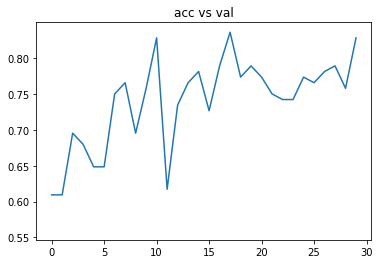

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])



plt.title("acc vs val")
plt.show()

In [26]:
from keras.models import load_model
model=load_model("bestmodel.h5")

In [27]:
acc=model.evaluate_generator(test_data)[1]
acc

0.5405405163764954

In [28]:
from keras.utils import load_img,img_to_array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


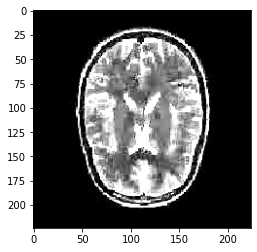

1/1 [==============================] - 0s 35ms/step
Brain Tumor Not Detected


In [38]:

path="train/Healthey/no2.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/225

plt.imshow(input_arr)
plt.show()

input_arr.shape


input_arr=np.expand_dims(input_arr,axis=0)



y_predict = np.argmax(model.predict(input_arr),axis=-0).astype('int32')
y_predict

if y_predict==1:
    print("Brain Tumor Detected")
else:
      print("Brain Tumor Not Detected")

In [30]:
import tensorflow as tf
print(tf. __version__)

2.9.1
